In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get current working directory
cwd = os.getcwd()
#read the csv
cb = pd.read_csv(cwd + "\customer_booking.csv", encoding="ISO-8859-1")

In [3]:
cb.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0


In [4]:
cb.shape

(50000, 14)

In [5]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

- num_passengers = number of passengers travelling
- sales_channel = sales channel booking was made on
- trip_type = trip Type (Round Trip, One Way, Circle Trip)
- purchase_lead = number of days between travel date and booking date
- length_of_stay = number of days spent at destination
- flight_hour = hour of flight departure
- flight_day = day of week of flight departure
- route = origin -> destination flight route
- booking_origin = country from where booking was made
- wants_extra_baggage = if the customer wanted extra baggage in the booking
- wants_preferred_seat = if the customer wanted a preferred seat in the booking
- wants_in_flight_meals = if the customer wanted in-flight meals in the booking
- flight_duration = total duration of flight (in hours)
- booking_complete = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

# Flight Day

In [6]:
cb["flight_day"].unique()
days = {day: i for i, day in enumerate(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], start=1)}
cb["flight_day"] = cb["flight_day"].replace(days)

In [7]:
cb["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
cb.flight_day.value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

# Sales Channel

In [9]:
cb['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [10]:
source={source: i for i, source in enumerate(["Internet","Mobile"], start=1)}
cb["sales_channel"] = cb["sales_channel"].replace(source)

In [11]:
cb["sales_channel"].unique() # 1= internet & 2= mobile

array([1, 2], dtype=int64)

In [12]:
percent_internet =  round(cb.sales_channel.value_counts().values[0]  / cb.sales_channel.count() *100,2)
percent_mobile =  round(cb.sales_channel.value_counts().values[1]  / cb.sales_channel.count() *100,2)
print("Booking done through internet:",percent_internet,"%")
print("Booking done through mobile:",percent_mobile,"%")

Booking done through internet: 88.76 %
Booking done through mobile: 11.24 %


# Trip type

In [13]:
cb["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [14]:
round_trip_count = cb["trip_type"].value_counts()["CircleTrip"]

In [15]:
trip={source: i for i, source in enumerate(["RoundTrip","CircleTrip","OneWay"], start=0)}
cb["trip_type"] = cb["trip_type"].replace(trip)
cb["trip_type"].unique()

array([0, 1, 2], dtype=int64)

In [16]:
percentage_round = cb.trip_type.value_counts().values[0]/ cb.trip_type.count() *100
percentage_oneway = cb.trip_type.value_counts().values[1]/ cb.trip_type.count() *100
percentage_circle = cb.trip_type.value_counts().values[2]/ cb.trip_type.count() *100
print(f"Percentage of round trips: {percentage_round} %")
print(f"Percentage of One way trips: {percentage_oneway} %")
print(f"Percentage of circle trips: {percentage_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


In [17]:
cb.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,1.112360,0.017800,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,1.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,0.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,0.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,0.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,2.000000,2.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [18]:
cb.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0


In [19]:
(cb.purchase_lead >548).value_counts()

False    49986
True        14
Name: purchase_lead, dtype: int64

There are few bookings that were made more than two years before the travel date, and it appears that booking that far in preparation is extremely unlikely. However, it could also be due to the cancellation and rebooking twice in a 6-month span. In most cases, airlines retain the tickets for rebooking within a year. However, at this time, we will treat them as outliers, which will have a significant impact on the predictive model's results.

If we presume that no buyer is booking more than a year in advance, we will remove all entries with a purchase lead of more than 548 days.

In [20]:
cb[cb.purchase_lead > 548]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,1,0,641,46,6,7,AKLKUL,Malaysia,1,0,1,8.83,1
2058,2,1,0,577,26,9,1,AKLKUL,New Zealand,0,0,0,8.83,0
2770,1,1,0,557,22,19,6,BLRMEL,India,1,0,1,8.83,0
6148,1,1,0,614,19,11,3,COKMEL,Australia,0,0,0,8.83,0
8770,2,1,0,584,45,11,7,DELSYD,India,1,1,0,8.58,0
20832,2,1,0,573,20,23,6,MELTRZ,Australia,1,0,0,8.83,0
20919,2,1,0,564,17,16,7,MELURT,Australia,1,0,1,8.83,0
24119,1,1,0,704,23,8,2,PNHSYD,Australia,0,0,0,8.58,0
33240,2,1,0,553,4,13,3,KBVTPE,Taiwan,1,0,0,4.67,0
38356,2,1,0,633,5,10,6,HKTOOL,Australia,0,0,1,8.83,0


In [21]:
#filtering the data to have only purchase lead days less than 600 days
cb = cb[cb.purchase_lead <548 ]

# Length Of Stay

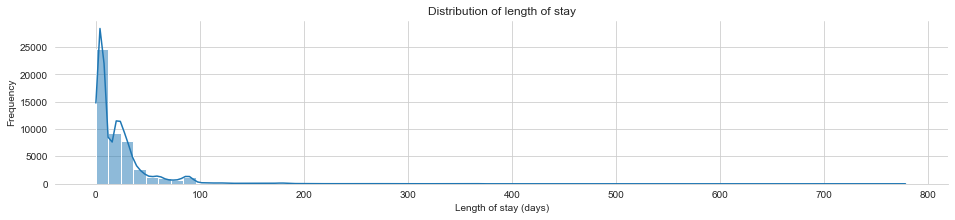

In [22]:
plt.figure(figsize=(16,3))
sns.set_style("whitegrid")
sns.histplot(data=cb, x="length_of_stay", binwidth=12,kde=True)
sns.despine(left=True)
plt.xlabel("Length of stay (days)")
plt.ylabel("Frequency")
plt.title("Distribution of length of stay")
plt.grid(True, axis="y")
plt.show()

In [23]:
(cb.length_of_stay> 200).value_counts()

False    49706
True       279
Name: length_of_stay, dtype: int64

In [24]:
cb[cb.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [25]:
cb[cb.length_of_stay> 400].booking_complete.value_counts()

0    13
1     4
Name: booking_complete, dtype: int64

In [26]:
#filtering the data to have only length of stay days less than 500 days
cb = cb[cb.purchase_lead < 400 ]

# Booking Origin

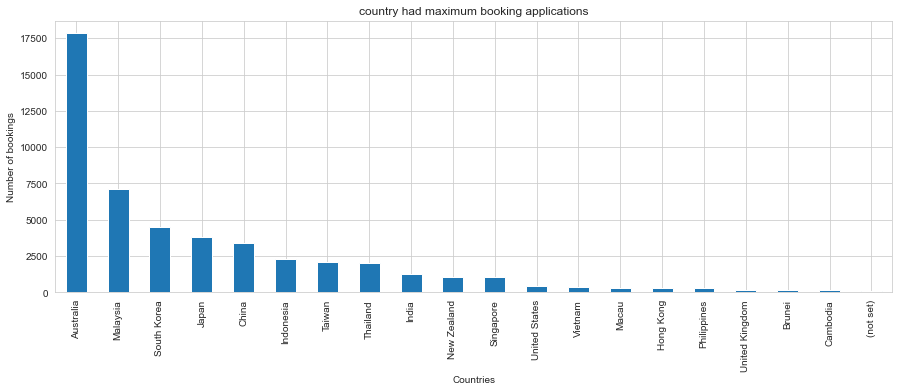

In [27]:
plt.figure(figsize=(15,5))
ax = cb.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")
plt.title("country had maximum booking applications")
plt.show()

# Booking complete

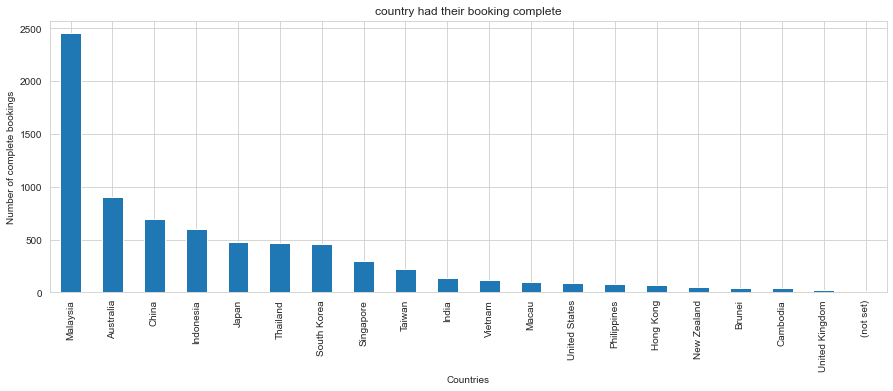

In [28]:
plt.figure(figsize=(15,5))
ax = cb[cb.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")
plt.title("country had their booking complete")
plt.show()

In [29]:
successful_booking = cb.booking_complete.value_counts().values[0]
successful_booking

42169

In [30]:
successful_booking1 = cb.booking_complete.value_counts().values[1]
successful_booking1

7430

In [31]:
successful_booking_per = cb.booking_complete.value_counts().values[0] / 49599 * 100

In [32]:
unsuccessful_booking_per = 100-successful_booking_per

In [33]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were complete.")

Out of 50000 booking entries only 14.98 % bookings were complete.


# Export the dataset to csv

In [34]:
cb.to_csv(cwd + "/filtered_customer_booking.csv")
cb.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0


In [35]:
cb.shape

(49599, 14)